# DATAVIZ AND FEATURE SELECTION ASSIGNMENT

### Overview:
I have chosen to use a high-Dimensionality loan prediction dataset found in one of kaggle's competitions 

The dataset contains 255,347 entries and 18 columns. The data structure is:

* Numerical Features: Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio.

* Categorical Features: Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner.

* Target Variable: Default (assumedly indicating whether the loan defaulted or not).

* Identifier: LoanID.

### Data preprocessing and basic EDA

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
data = pd.read_csv('Loan_default.csv')

# Displaying the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

(None,
        LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
 0  I38PQUQS96   56   85994       50587          520              80   
 1  HPSK72WA7R   69   50432      124440          458              15   
 2  C1OZ6DPJ8Y   46   84208      129188          451              26   
 3  V2KKSFM3UN   32   31713       44799          743               0   
 4  EY08JDHTZP   60   20437        9139          633               8   
 
    NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
 0               4         15.23        36      0.44   Bachelor's   
 1               1          4.81        60      0.68     Master's   
 2               3         21.17        24      0.31     Master's   
 3               3          7.07        24      0.23  High School   
 4               4          6.51        48      0.73   Bachelor's   
 
   EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
 0      Full-time      Divorced         Yes           Yes       Other 

#### Some initial dataviz

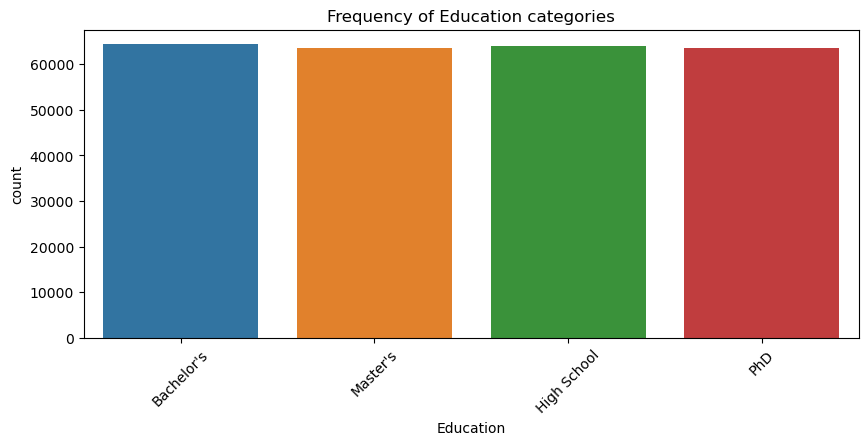

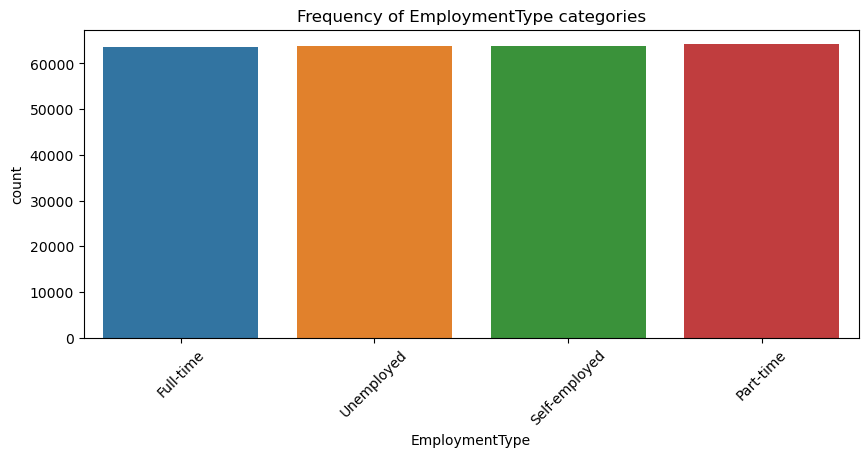

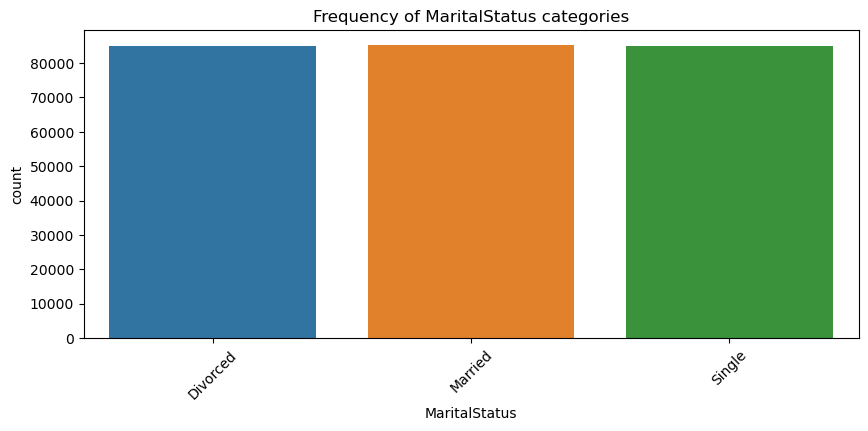

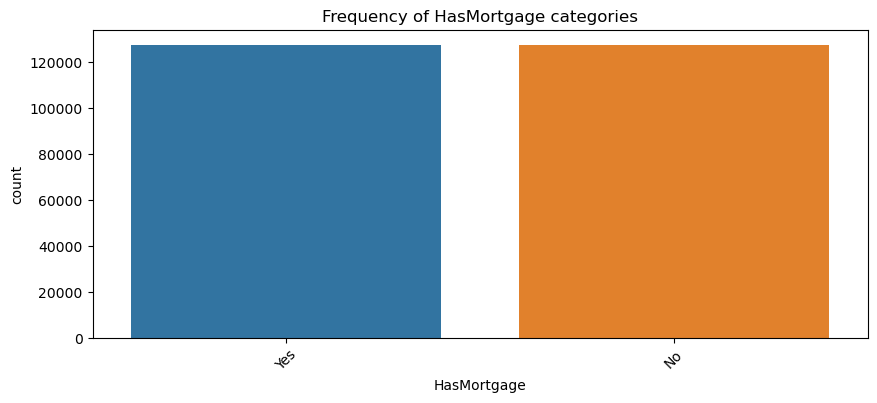

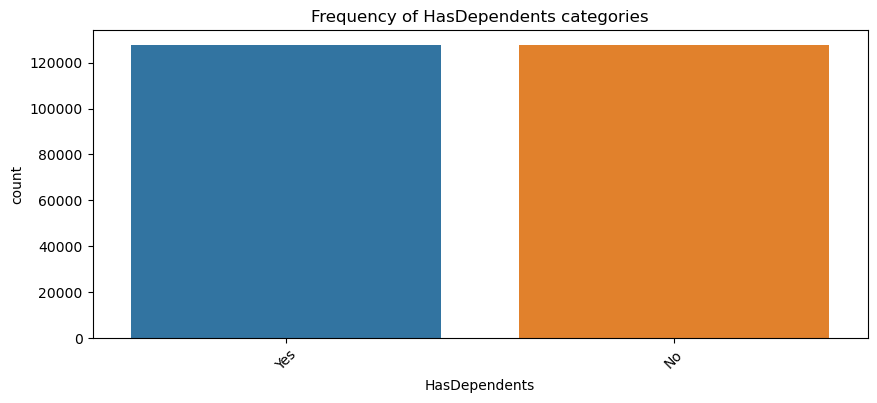

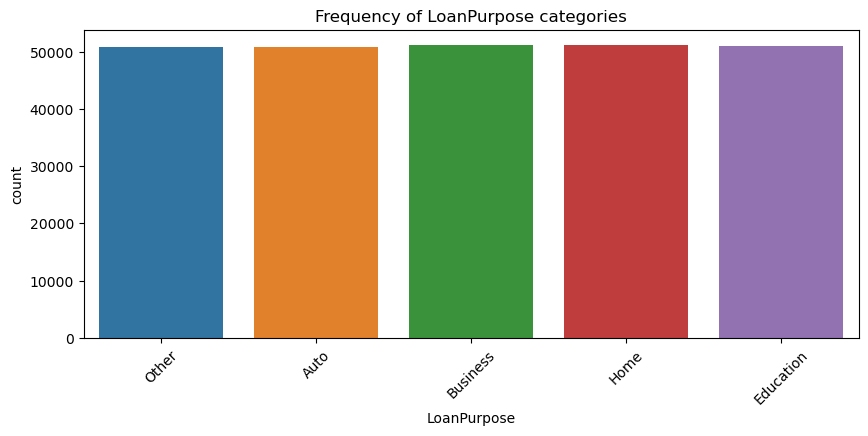

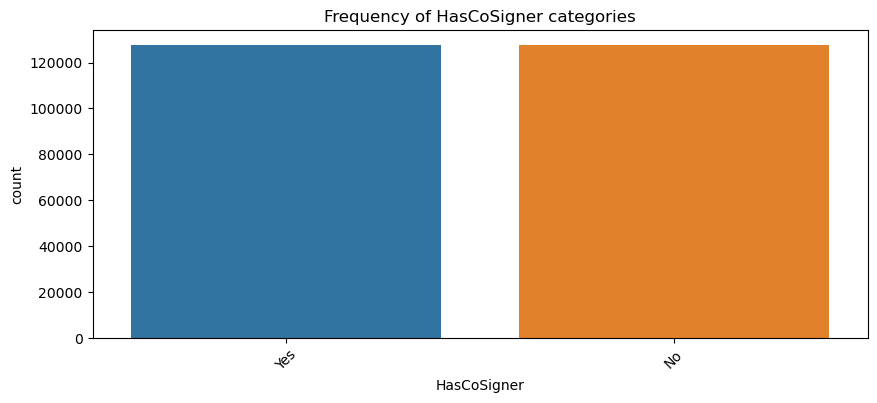

In [4]:
# Defining the categorical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Frequency of {col} categories')
    plt.xticks(rotation=45)
    plt.show()



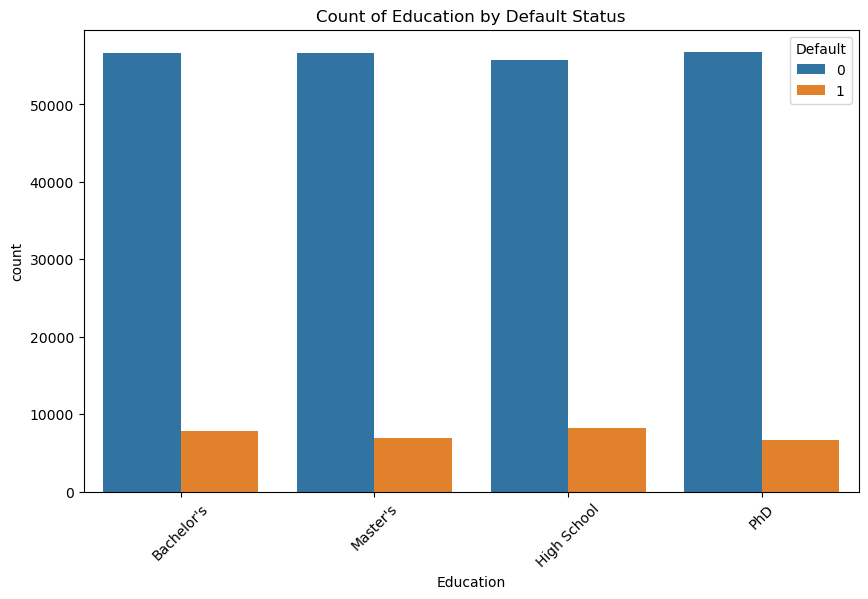

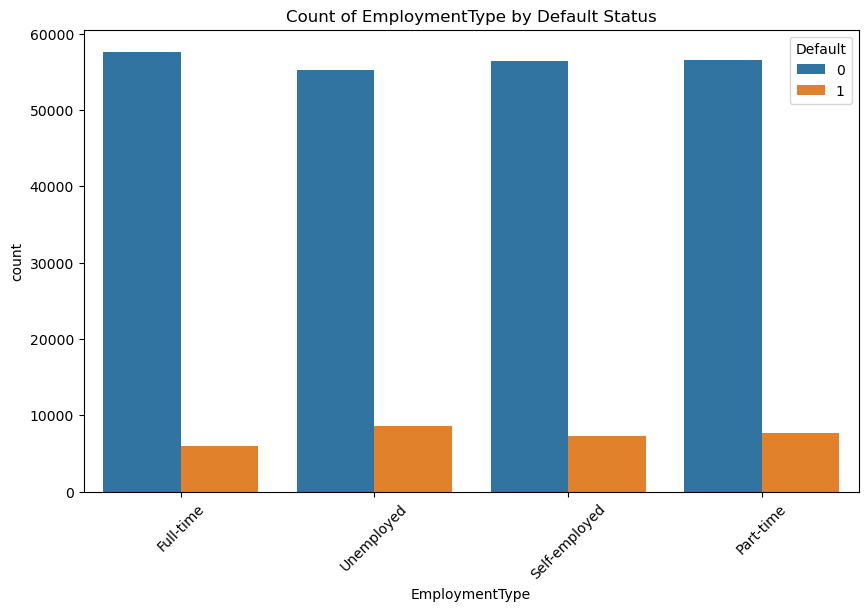

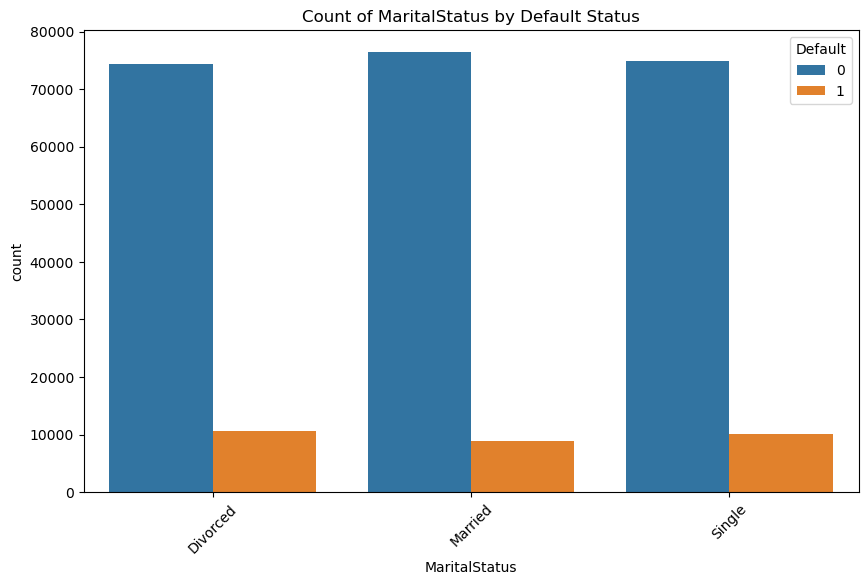

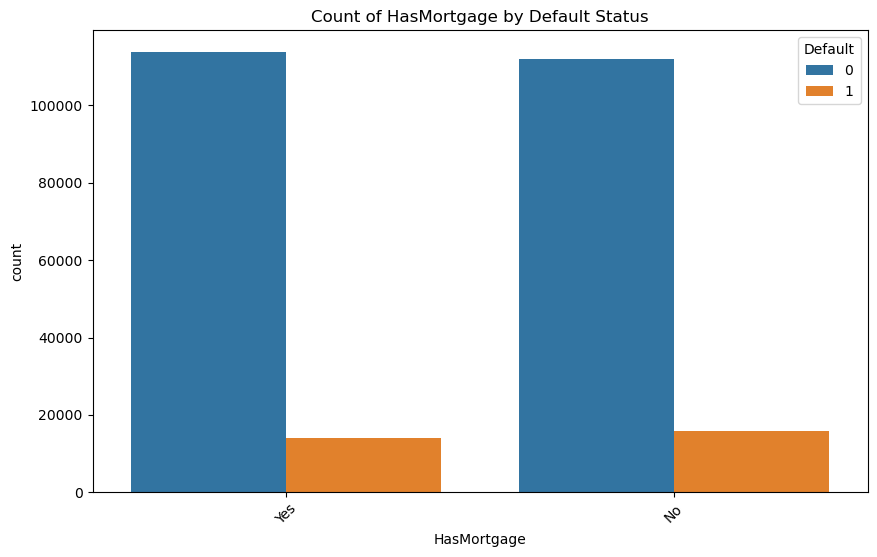

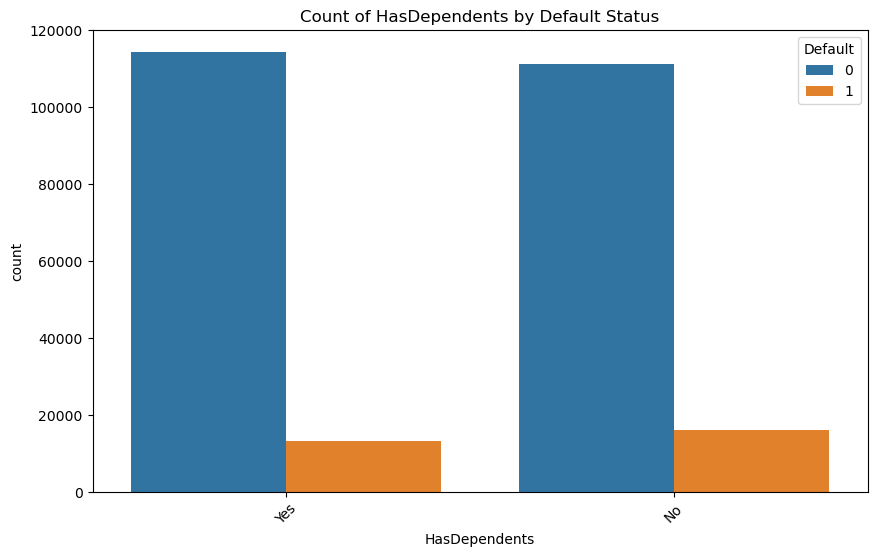

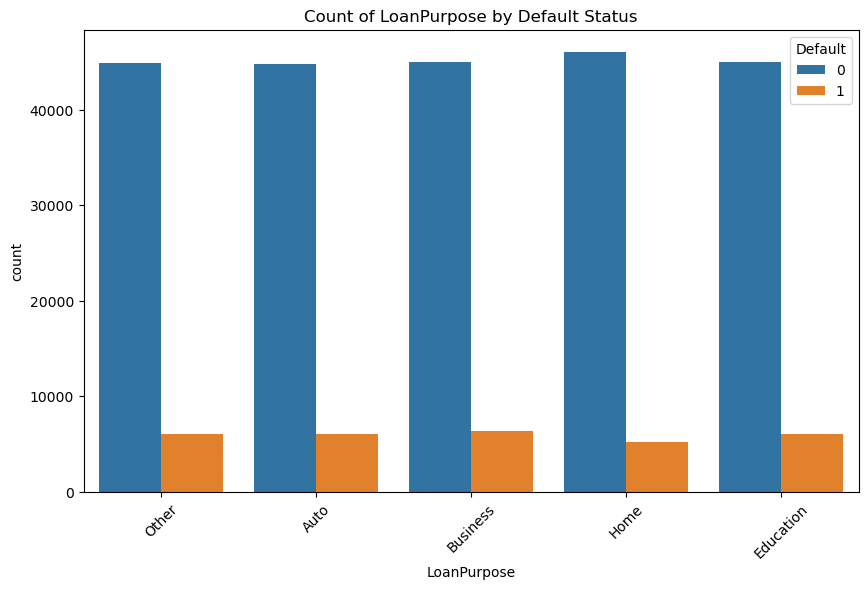

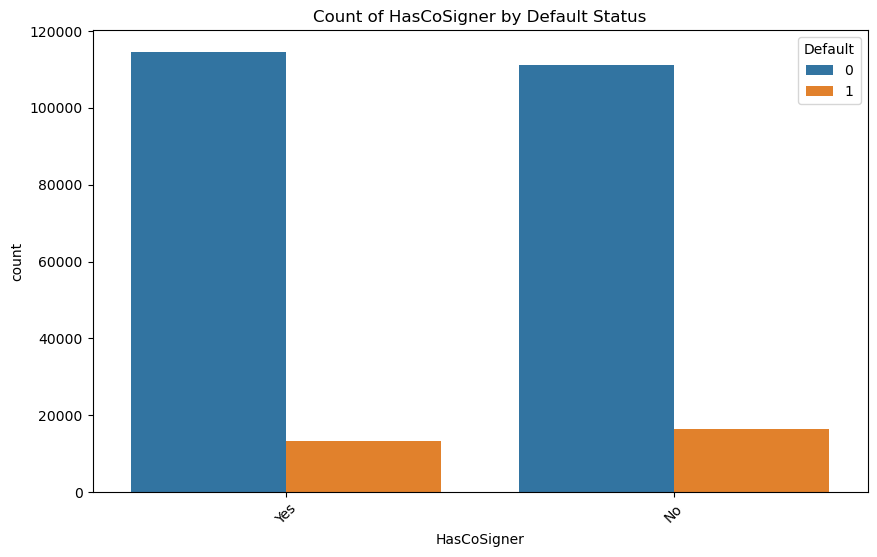

In [5]:
# viewing te relationships between the categorical and target variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue="Default", data=data)
    plt.title(f'Count of {col} by Default Status')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
#dropped LoanID identifier column and applied one hot encoding
data = data.drop('LoanID', axis=1)
data = pd.get_dummies(data)


In [8]:
print(data.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes'],
      dtype='object')


In [9]:
#encoding the labels
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [10]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,True,False,True,False,False,False,False,True,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,True,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,True,True,False,False,False,False,True,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,True,False,False,False,True,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,True,True,False,False,False,False,True,False


In [11]:
#encoding categorical variables

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Display the first few rows of the dataset to verify changes
data.head()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,True,False,True,False,False,False,False,True,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,True,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,True,True,False,False,False,False,True,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,True,False,False,False,True,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,True,True,False,False,False,False,True,False


In [12]:
#scaling the numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.difference(['Default'])
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,...,True,False,True,False,False,False,False,True,False,True
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,0,...,False,True,False,False,False,False,False,True,False,True
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,1,...,True,False,True,True,False,False,False,False,True,False
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,0,...,False,True,False,False,True,False,False,False,True,False
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,...,False,False,True,True,False,False,False,False,True,False


### Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
#statistical summary of the data
print(data.describe())

                Age        Income    LoanAmount   CreditScore  MonthsEmployed  \
count  2.553470e+05  2.553470e+05  2.553470e+05  2.553470e+05    2.553470e+05   
mean  -1.808726e-16  3.695367e-17  4.082156e-17  2.277882e-16    9.345549e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00    1.000002e+00   
min   -1.700995e+00 -1.732398e+00 -1.730348e+00 -1.725980e+00   -1.718715e+00   
25%   -8.337635e-01 -8.642522e-01 -8.670578e-01 -8.638217e-01   -8.527470e-01   
50%   -3.324207e-02 -8.547763e-04 -3.227743e-04 -1.663564e-03    1.322113e-02   
75%    8.339895e-01  8.654300e-01  8.668216e-01  8.667877e-01    8.791892e-01   
max    1.701221e+00  1.732408e+00  1.728108e+00  1.728946e+00    1.716292e+00   

       NumCreditLines  InterestRate      LoanTerm      DTIRatio        Default  
count    2.553470e+05  2.553470e+05  2.553470e+05  2.553470e+05  255347.000000  
mean    -4.499206e-17 -6.619937e-16  1.849770e-16  5.248088e-17       0.116128  
std      1.000002e+00  1.00

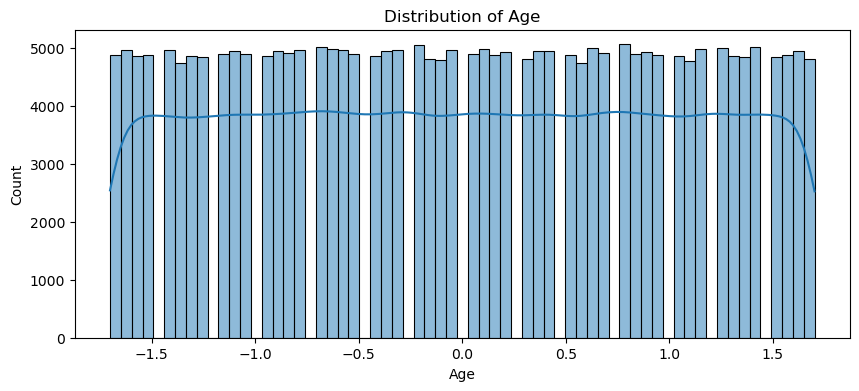

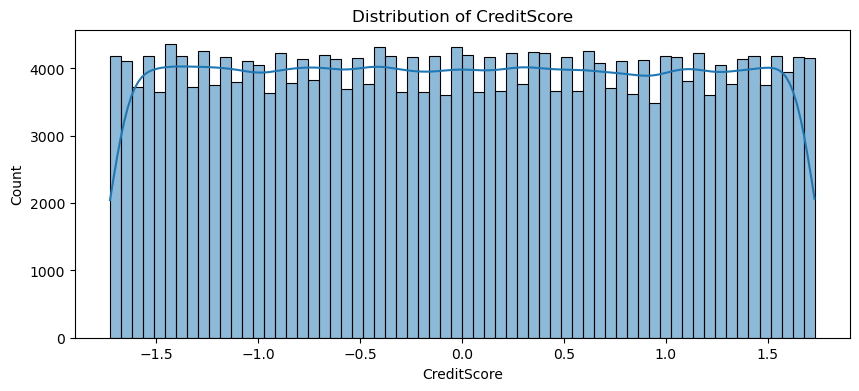

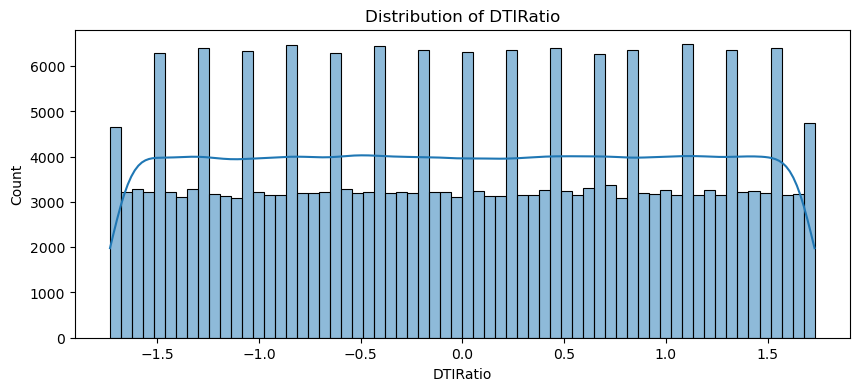

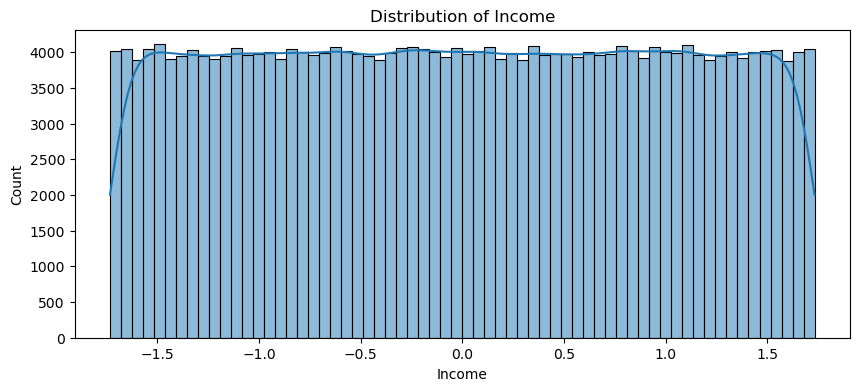

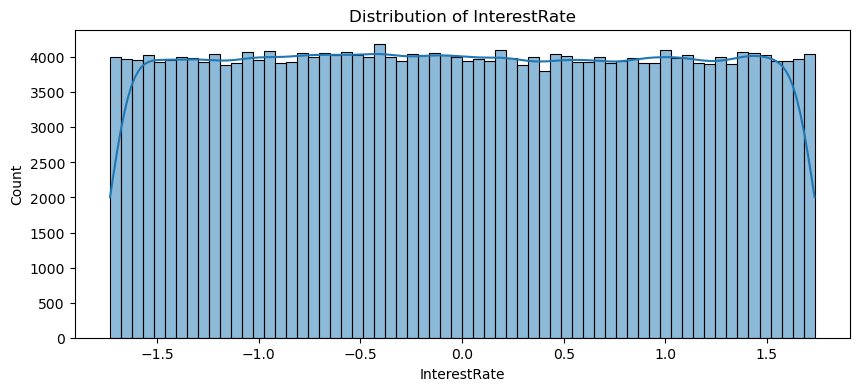

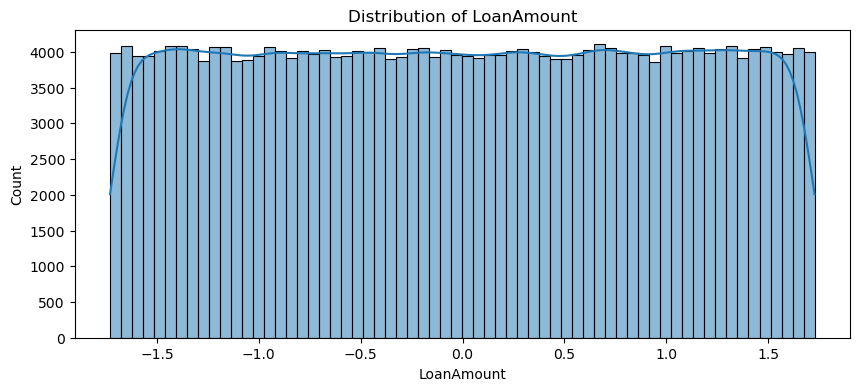

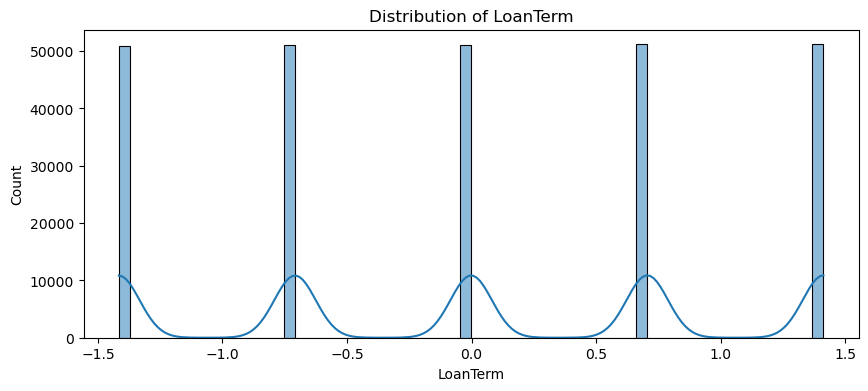

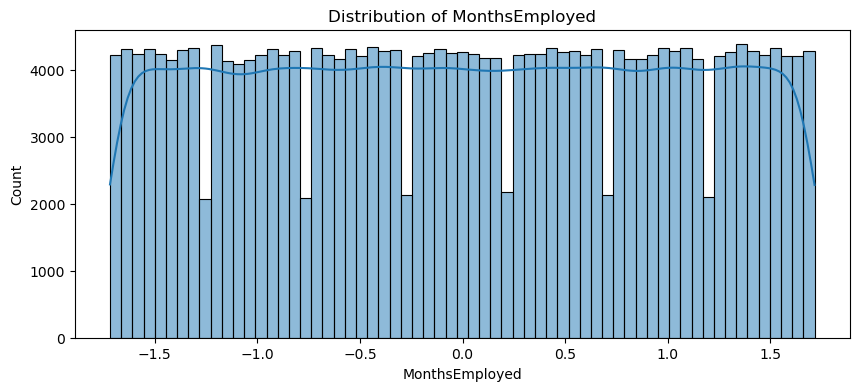

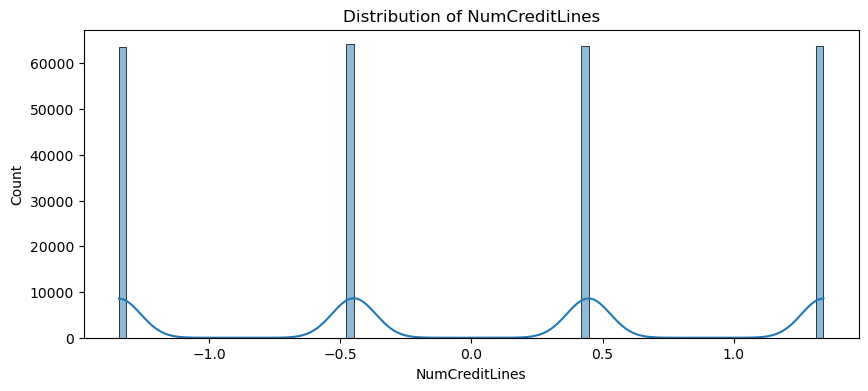

In [14]:
#Visualizing the data 
for col in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


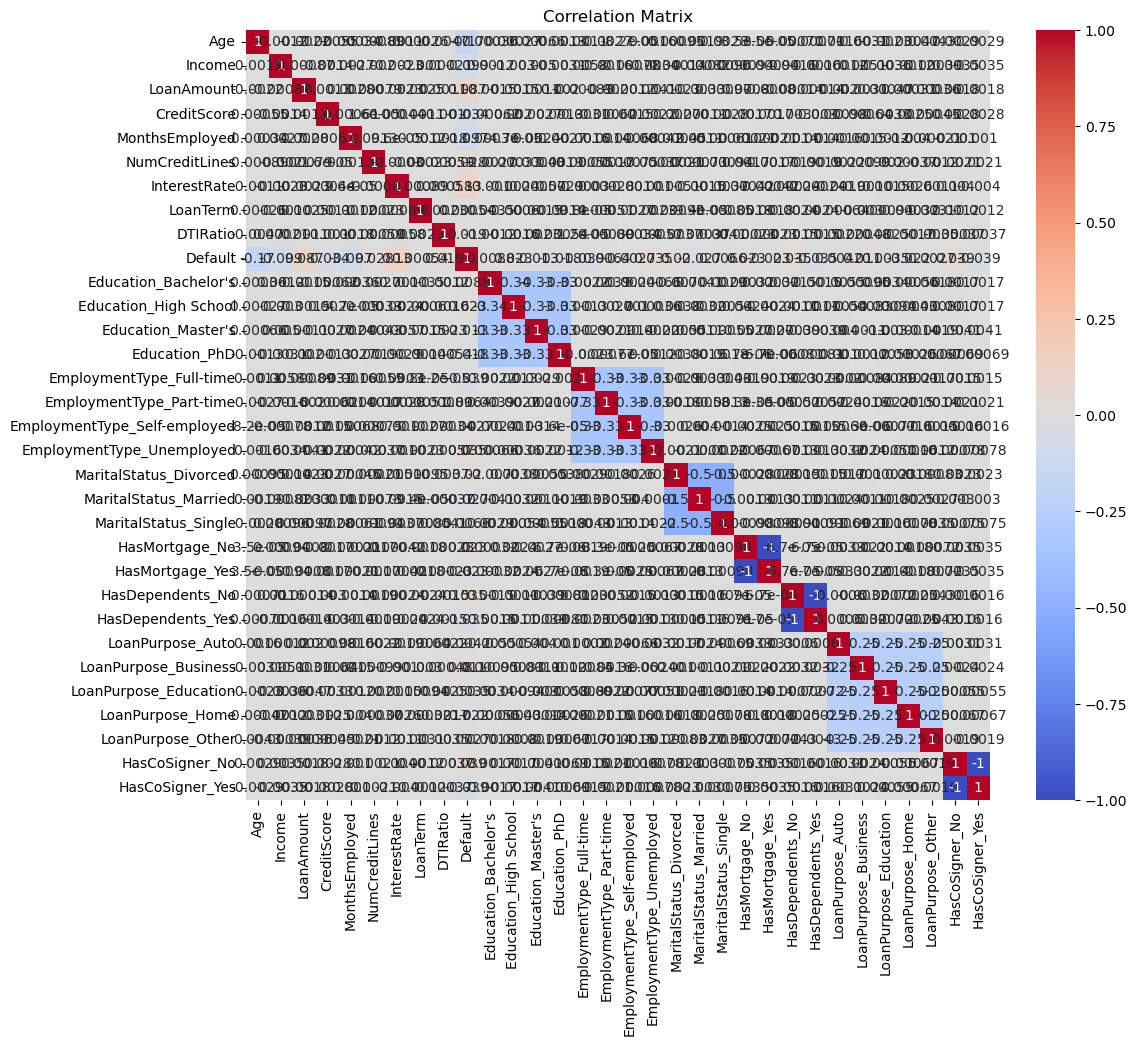

In [15]:
#correlation matrix - too big and jumbled. Finetune

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


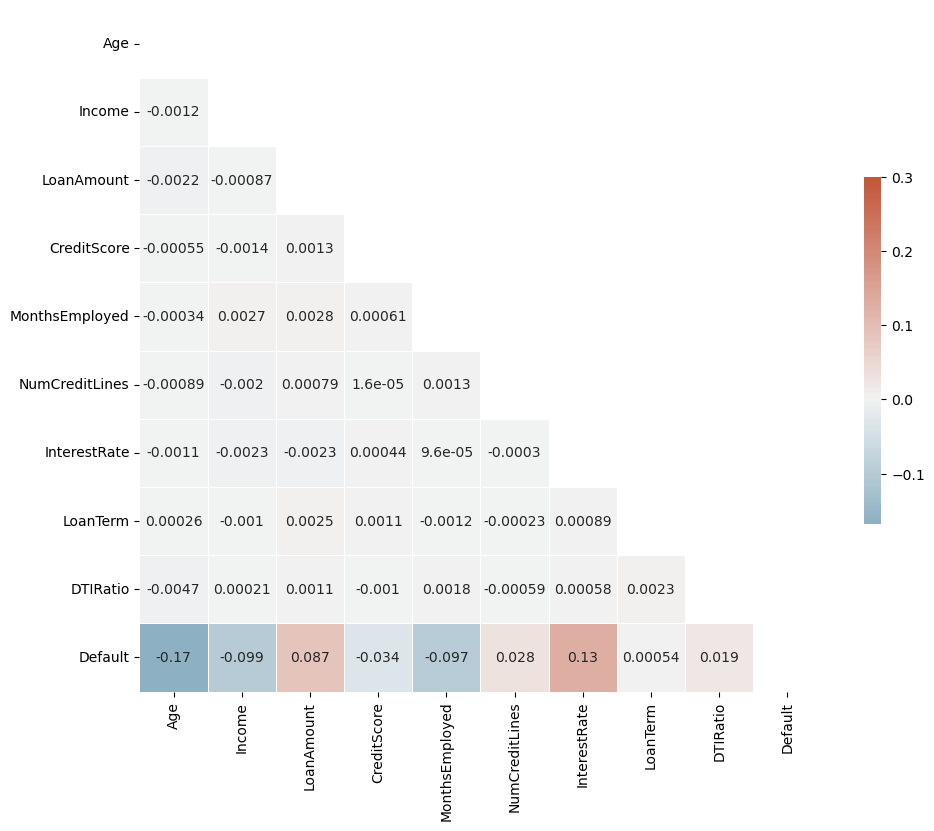

In [16]:
#reworked correlation matrix
# List of original categorical variables before encoding
original_categoricals = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Find all columns that are not one-hot encoded
# This assumes one-hot encoded columns have '_<category>' as a suffix
non_one_hot_columns = [col for col in data.columns if not any(col.startswith(cat) for cat in original_categoricals)]

# Select only these columns
reduced_data = data[non_one_hot_columns]

# Calculate the correlation matrix for the reduced dataset
corr = reduced_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


This correlation matrix indicates generally weak linear relationships among the features, with correlation coefficients predominantly close to zero. Notably, the target variable "Default" shows a moderate negative correlation with "CreditScore," suggesting that lower credit scores may be associated with a higher likelihood of defaulting. Additionally, there's a moderate positive correlation with "DTIRatio" and "LoanAmount," implying that higher debt-to-income ratios and larger loan amounts might also be indicators of an increased risk of default. These relationships could be valuable for predictive modeling, although the overall weak correlations suggest that complex, non-linear interactions may be at play, and further analysis or feature engineering might be necessary to capture these subtleties in the data.

C:\Users\tosin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


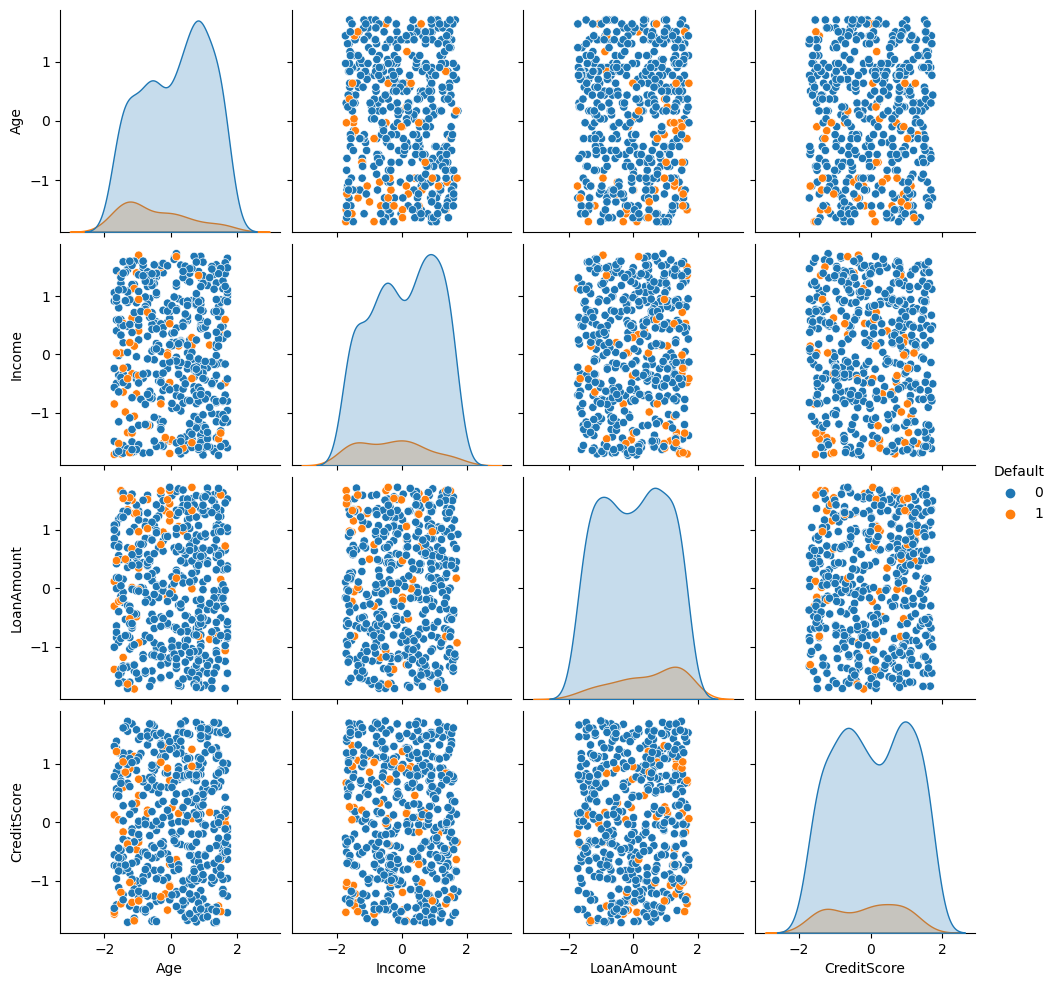

In [17]:
#pair plots
sns.pairplot(data.sample(500), hue='Default', vars=['Age', 'Income', 'LoanAmount', 'CreditScore'])


### Dimensionality reduction using PCA, t-SNE and UMAP

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import umap.umap_ as umap

In [18]:
# Dimensionality reduction with PCA
pca = PCA(n_components=0.95)  
pca_features = pca.fit_transform(data[numerical_features])
#pca.explained_variance_ratio_
pca_features

array([[ 0.77935296,  0.1394649 ,  0.22039444, ...,  0.98131674,
         0.45292906, -0.06695008],
       [ 0.84267615, -0.64290466, -0.15242063, ..., -0.48723292,
         1.22566776,  0.1108054 ],
       [ 1.08423156, -0.25115105, -0.49455748, ..., -0.2094172 ,
        -1.23170435,  0.69065792],
       ...,
       [-0.64908957, -0.18859821,  1.65331168, ...,  0.46581695,
         0.22011844,  0.03426445],
       [ 0.57772601, -1.04175002, -0.98674997, ...,  0.47704358,
        -0.04916197, -0.20638965],
       [ 1.3695715 ,  0.56580869,  0.66632235, ..., -1.12096317,
         2.37208614, -1.12200137]])

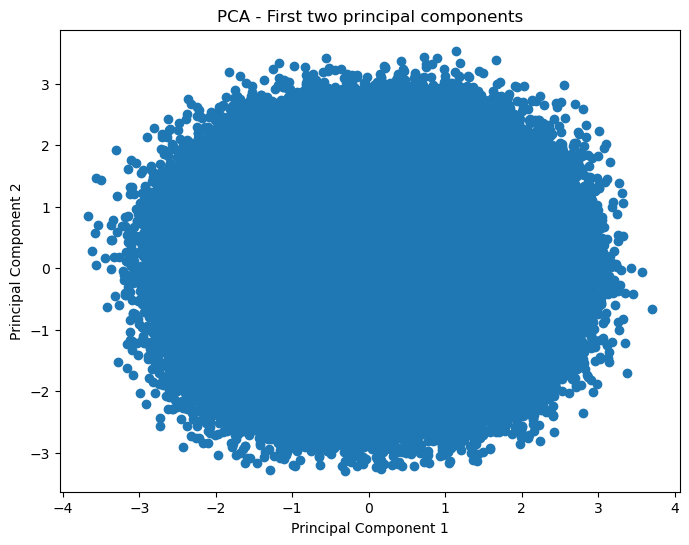

In [19]:
# Assuming 'pca_features' are the transformed PCA features
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1])  # Plotting only the first two components
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First two principal components')
plt.show()


In [22]:
#Dimensionality reduction with t-SNE
tsne_features = TSNE(n_components=2, perplexity=30).fit_transform(data[numerical_features])



KeyboardInterrupt



In [23]:
#This t-SNE is taking way too much time to execute. Just too much

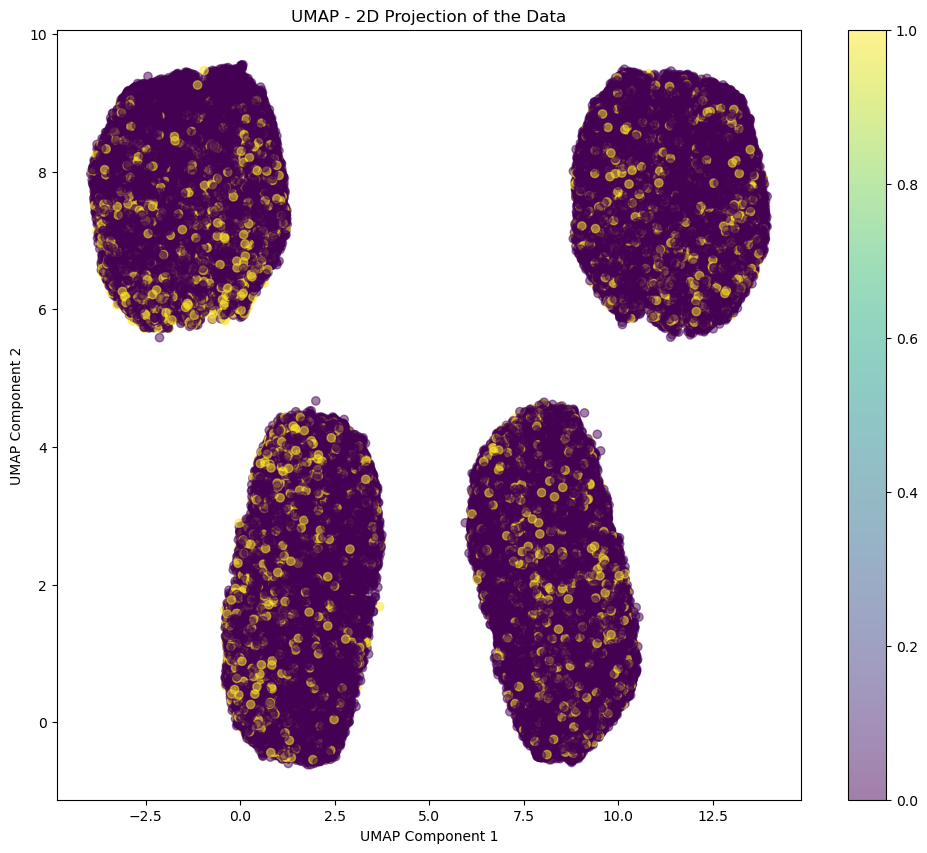

In [20]:
#Dimensionality reduction with UMAP
umap_features = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2).fit_transform(data[numerical_features])

# creating a plot to visualize 
plt.figure(figsize=(12, 10))
plt.scatter(umap_features[:, 0], umap_features[:, 1], c=data['Default'], alpha=0.5, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP - 2D Projection of the Data')
plt.colorbar() 
plt.show()


The UMAP projection of the dataset shows a non-linear structure with the emergence of distinct clusters, indicative of inherent groupings within the multidimensional data space. These clusters, characterized by dense concentrations of data points, suggest that the dataset contains subsets with unique properties that differentiate them from one another. The differentiation is visually evident in the 2D UMAP scatter plot, where the separation between clusters might correspond to varying attributes or outcomes within the dataset. The colors representing the target variable 'Default' indicate that the dataset may be amenable to classification algorithms that capitalize on these newly uncovered structures.

The clusters could potentially reflect different customer segments, risk categories, or other domain-specific groupings that are significant to the underlying problem. Further analysis would involve examining the characteristic features of the data points within each cluster, which could reveal commonalities or patterns such as demographic similarities, behavioral traits, or risk factors. The clarity of separation between clusters in the  visualization also suggests a potential for developing predictive models that can accurately classify new observations. 

### Feature Selection

In [22]:
#Feature selection using a filter method, ANOVA F-test

from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = data.drop('Default', axis=1)  # all columns except target
y = data['Default']               # target column

# Apply SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, y)

# Get scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization and print them
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # Naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))   # Printing the 10 best features


                      Feature        Score
0                         Age  7396.485591
6                InterestRate  4477.416962
1                      Income  2533.572441
4              MonthsEmployed  2444.270880
2                  LoanAmount  1932.102932
29             HasCoSigner_No   391.144338
30            HasCoSigner_Yes   391.144338
13   EmploymentType_Full-time   382.248644
16  EmploymentType_Unemployed   312.413213
22           HasDependents_No   307.434351


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Separating the features and the target
X = data.drop('Default', axis=1)  # all columns except target
y = data['Default']               # target column

# Model to be used for RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE model declaration with the number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Summarize the selection of the attributes
print("Num Features: %s" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Unfortunately, I had to interrupt the processing here in order to evaluate a model based on the filter methods first

### Modelling based on the selected features

In [25]:
# loading required packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
## Model based on the top features from filter methods
# List of selected features based on the filter method
selected_features = [
    'Age', 'InterestRate', 'Income', 'MonthsEmployed', 'LoanAmount',
    'HasCoSigner_No', 'HasCoSigner_Yes', 'EmploymentType_Full-time',
    'EmploymentType_Unemployed', 'HasDependents_No'
]

# subsetting the data to the selected features
X = data[selected_features]
y = data['Default']

# The training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67681
           1       0.52      0.06      0.11      8924

    accuracy                           0.88     76605
   macro avg       0.70      0.53      0.52     76605
weighted avg       0.85      0.88      0.84     76605

[[67165   516]
 [ 8366   558]]


This model is showing some heavy signs of class imbalance as it seems better at predicting the majority class(0) but it's struggling with predicting the minority class(1) as seen from the accuracy and, recall and f1 scores above. I would be attempting to fix this class imbalance by applying resampling techniques

In [33]:
# Get the number of instances for the minority class
n_min_class = data['Default'].value_counts().min()

# Creating a balanced DataFrame by sampling from the majority class
data_min = data[data['Default'] == 1]
data_maj = data[data['Default'] == 0]

data_maj_sample = data_maj.sample(n=n_min_class, random_state=42)  # Sample from majority class
data_balanced = pd.concat([data_min, data_maj_sample])  # Combine minority class with sampled majority class

X_balanced = data_balanced.drop('Default', axis=1)  
y_balanced = data_balanced['Default']               
